In [80]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from scipy.interpolate import interpolate
from pylab import cm  
from matplotlib.colors import LogNorm

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [4]:
import stistools

Extracting only the observations from Bourrier+17a, trying to recreate them exactly.

In [5]:
x1ds = glob.glob('/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/*x1d*')

In [6]:
x1ds

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/od3v02010_b17_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/od3v01010_b17_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/od3v01020_b17_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_extract/od3v03010_b17_x1d.fits']

In [7]:
lya = Table.read('../combined/bourrier_lya.txt', format ='ascii')
lw, lf = lya['WAVELENGTH'], lya['FLUX']

In [8]:
f_new = []
e_new = []
i = 0
for x in x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
       # wi, fi = resample.bintogrid(data['WAVELENGTH'], data['FLUX'],  newx = w_new )
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i += 1
#w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
#f_new = np.average(f_new, weights = 1/np.array(e_new)
#e_new = np.mean(np.array(e_new), axis=0)
e_new = (np.sum(np.array(e_new)**2, axis=0)**0.5)/(i**0.5)


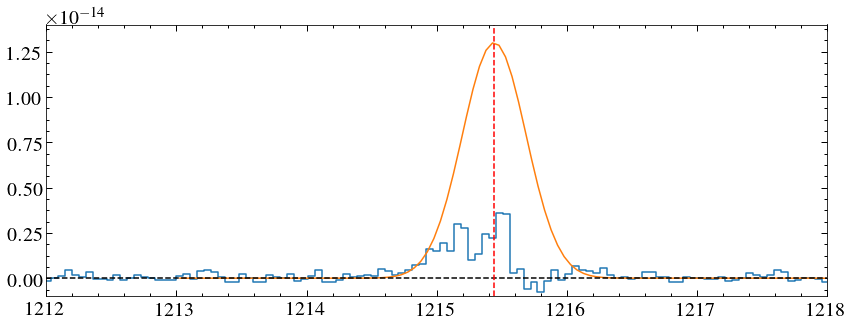

In [9]:
plt.step(w_new, f_new)
#plt.step(w_new, e_new)
#plt.step(w_full, f_full)
plt.plot(lw, lf)
plt.xlim(1212, 1218)

plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

Not the same...

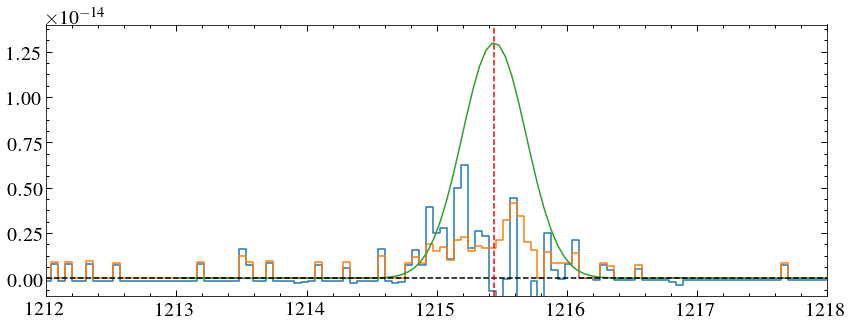

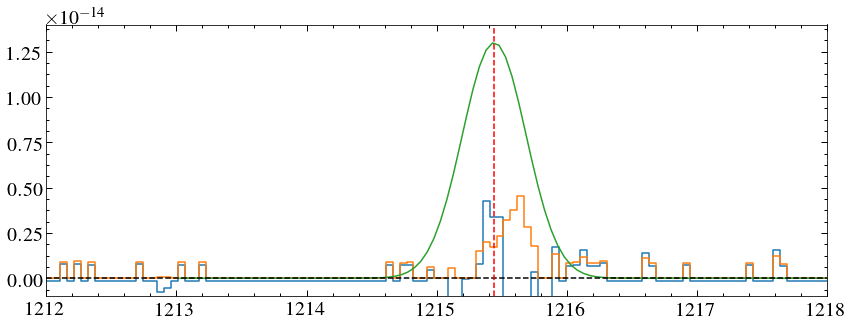

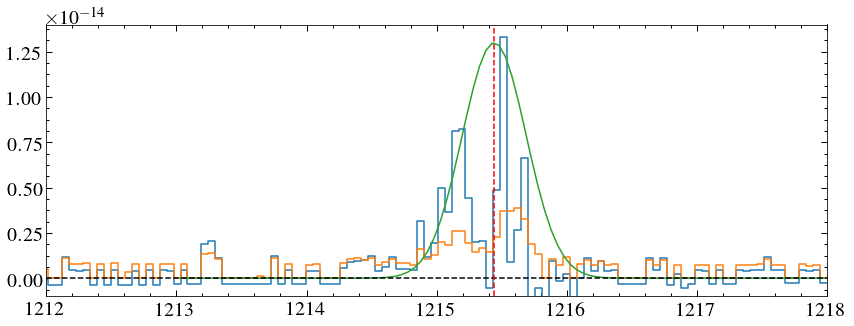

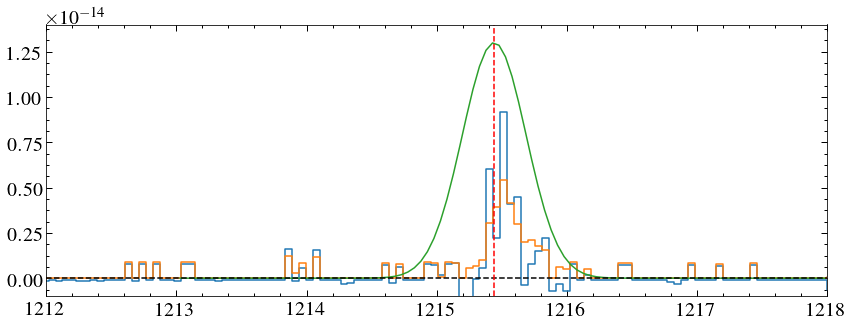

In [10]:
for x in x1ds:
    data = fits.getdata(x,1)[0]
    #date = fits.getheader(x, 0)['TDATEOBS']
   # if date in dates[0:3]:
    #    print(date)
    plt.step(data['WAVELENGTH'], data['FLUX'])
    plt.step(data['WAVELENGTH'], data['ERROR'])
    plt.plot(lw, lf)
    plt.xlim(1212, 1218)

    plt.ylim(-1e-15, 1.4e-14)
    plt.axhline(0, c='k', ls ='--')
    plt.axvline(1215.44, ls ='--', c='r')
    plt.show()

Huh. Did I do the extraction wrong? Start agian from scratch...

In [12]:
path = '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/'

Let's look at the automated output.

In [17]:
old_x1ds = glob.glob(path+'*x1d.fits')
old_x1ds

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01010_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01020_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v02010_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v03010_x1d.fits']

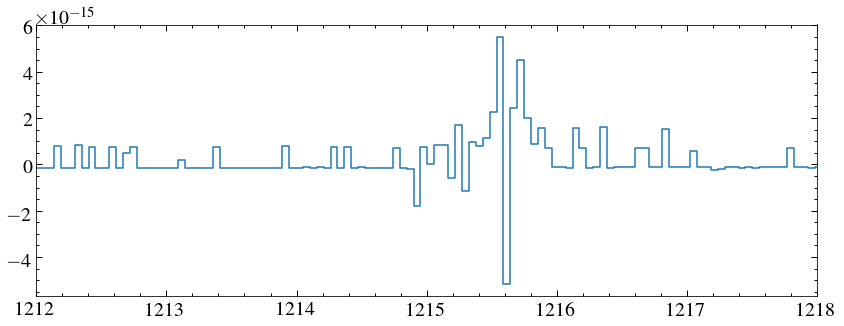

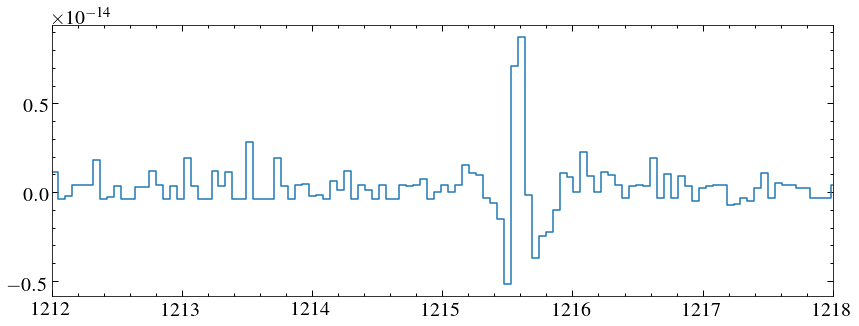

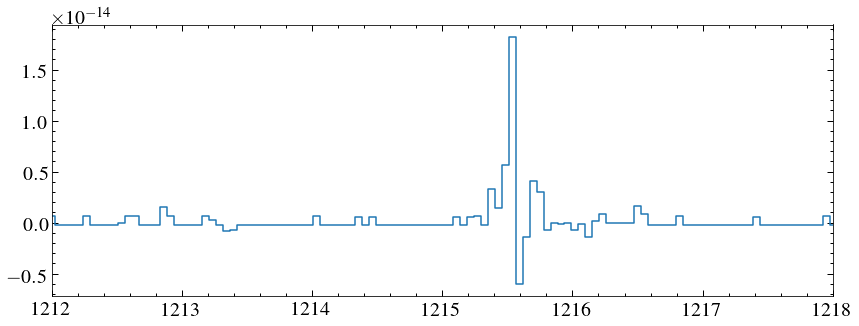

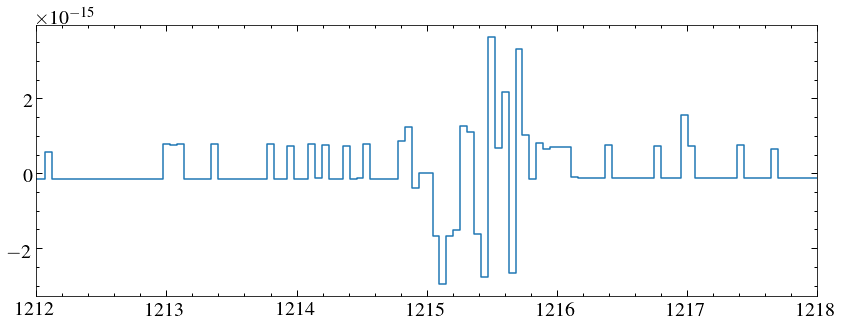

In [25]:
for x in old_x1ds:
    data = fits.getdata(x,1)[0]
    plt.step(data['WAVELENGTH'], data['FLUX'])
    plt.xlim(1212, 1218)
    plt.show()

Ok so those were a failure. VB sent me his spectral centres, should be able to recal using those, without adjusting the background as he only did that for paper 2.

In [27]:
raws = glob.glob(path+'*raw.fits')
raws

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v03010_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v02010_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01020_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01010_raw.fits']

In [28]:
b_centers = np.array([415, 415, 416, 176]) #in date order


In [29]:
for raw in raws:
    print(raw, fits.getheader(raw,0)['TDATEOBS'])

/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v03010_raw.fits 2016-11-23
/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v02010_raw.fits 2016-09-30
/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01020_raw.fits 2016-09-26
/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01010_raw.fits 2016-09-26


In [30]:
raws = raws[::-1]
raws

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01010_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01020_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v02010_raw.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v03010_raw.fits']

In [31]:
outpath = path +'outputs/'

In [49]:
flts = glob.glob(path+'*flt.fits')
flts

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v02010_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01020_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v03010_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01010_flt.fits']

In [50]:
flts = [flts[3], flts[1], flts[0], flts[2]]

In [36]:
os.environ['oref'] = path 

In [66]:
new_x1ds = glob.glob(outpath+'*x1d.fits')
if len(new_x1ds) > 0:
    [os.remove(x) for x in new_x1ds]

i = 0
for raw in flts:
    rootname = fits.getheader(raw,0)['ROOTNAME']
    stistools.x1d.x1d(raw, output=outpath+rootname+'_new_x1d.fits', verbose=True, trailer='b17test.trl',a2center=b_centers[i], maxsrch=10)
    i += 1

new_x1ds = glob.glob(outpath+'*new_x1d.fits')                
print(len(new_x1ds))


Appending to trailer file b17test.trl
Running x1d on /home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01010_flt.fits
  ['cs6.e', '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01010_flt.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v01010_new_x1d.fits', '-v', '-back', '-cte', '-disp', '-hel', '-flux', '-c', '415', '-r', '10', '-bm', '-bo', '3', '-a', 'unweighted']
Appending to trailer file b17test.trl
Running x1d on /home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01020_flt.fits
  ['cs6.e', '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01020_flt.fits', '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v01020_new_x1d.fits', '-v', '-back', '-cte', '-disp', '-hel', '-flux', '-c', '415', '-r', '10', '-bm', '-bo', '3', '-a', 'unweighted']
Appending to trailer file b17test.trl
Running x1d on /home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v02010_flt.fits
  ['cs6.e', '/ho

In [54]:
new_x1ds

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v02010_new_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v01010_new_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v03010_new_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v01020_new_x1d.fits']

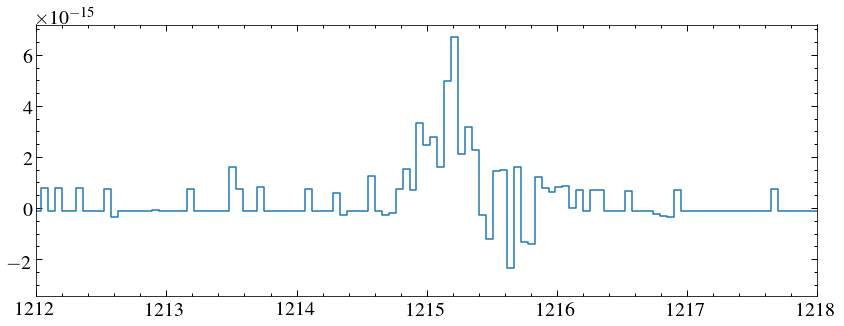

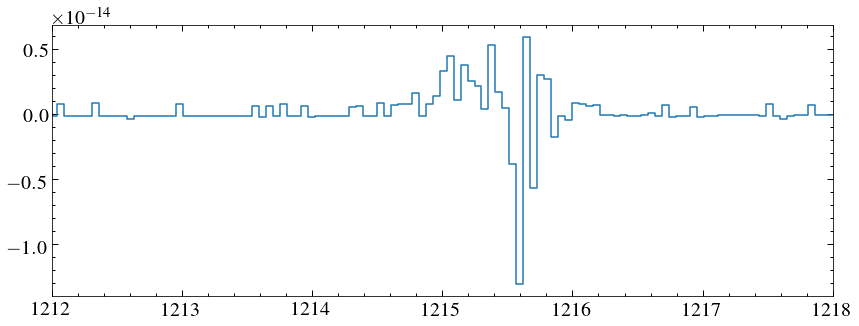

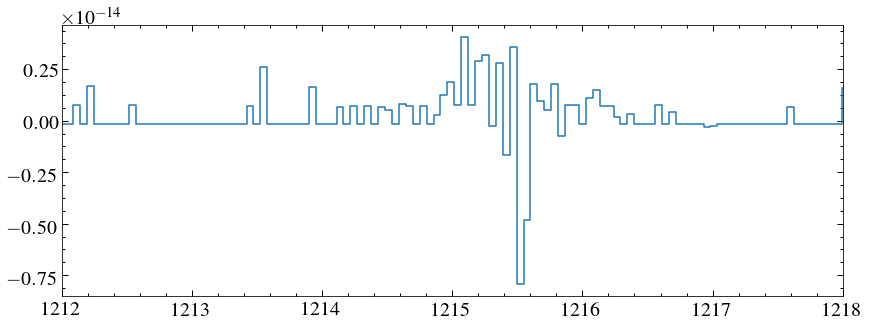

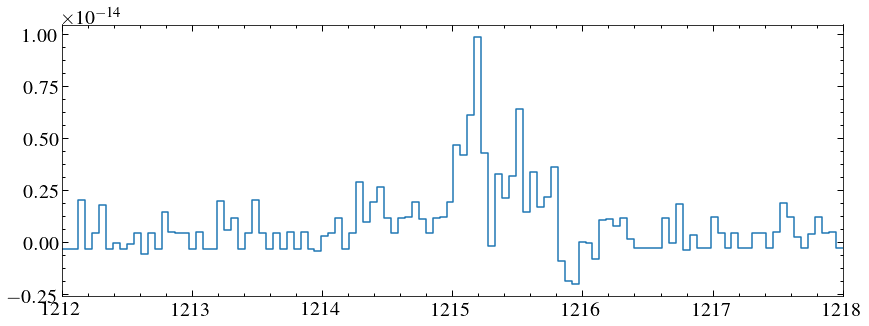

In [67]:
for x in new_x1ds:
    data = fits.getdata(x,1)[0]
    plt.step(data['WAVELENGTH'], data['FLUX'])
    plt.xlim(1212, 1218)
    plt.show()

In [40]:
#w_old, f_old, e_old = w_new, f_new, e_new 

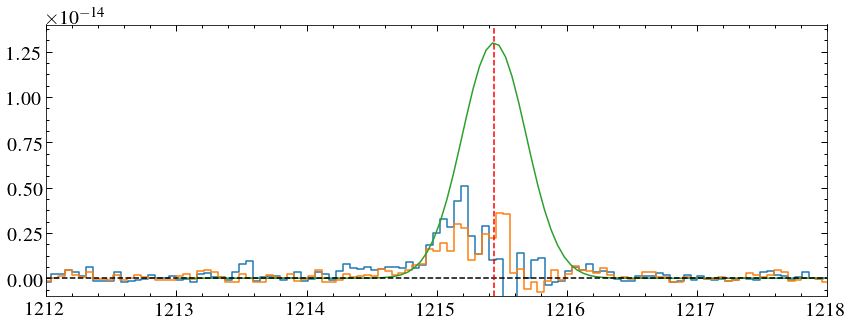

In [70]:
f_new = []
e_new = []
i = 0
for x in new_x1ds:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
       # wi, fi = resample.bintogrid(data['WAVELENGTH'], data['FLUX'],  newx = w_new )
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i += 1
#w_new = data['WAVELENGTH']
f_new = np.mean(np.array(f_new), axis=0)
#f_new = np.average(f_new, weights = 1/np.array(e_new)
#e_new = np.mean(np.array(e_new), axis=0)
e_new = (np.sum(np.array(e_new)**2, axis=0)**0.5)/(i**0.5)

plt.step(w_new, f_new)
plt.step(w_old, f_old)
#plt.step(w_full, f_full)
plt.plot(lw, lf)
plt.xlim(1212, 1218)

plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

Flux still isn't high enough, should be ~0.75e-14. Maybe it was coadded?

In [57]:
def spectra_adder(fluxes, errors):
    """
    combines the flux at each overlap
    """
    weight_f = np.average(fluxes, axis =0, weights=(1/errors))
    weight_e = np.average((weight_f - fluxes)**2, axis=0, weights = (1/errors))**0.5
    return weight_f, weight_e

In [59]:
#w_mean, f_mean, e_mean = w_new, f_new, e_new

/home/david/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


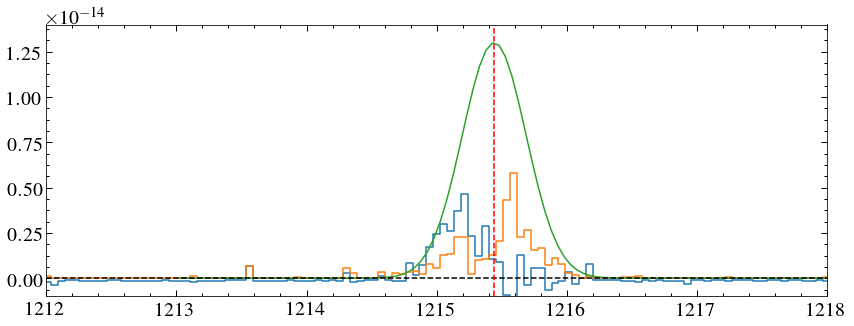

In [71]:
f_new = []
e_new = []
i = 0
for x in new_x1ds:
    rootname = fits.getheader(x,0)['ROOTNAME']
    #if picks['A2CENTER'][np.argwhere(picks['ROOTNAME']==rootname)[0][0]] != 0.0:
    data = fits.getdata(x, 1)[0]
    if i == 0:
        w_new = data['WAVELENGTH']
        f_new.append(data['FLUX'])
        e_new.append(data['ERROR'])
    else:
        fi = interpolate.interp1d(data['WAVELENGTH'], data['FLUX'], fill_value='extrapolate')(w_new)
       # wi, fi = resample.bintogrid(data['WAVELENGTH'], data['FLUX'],  newx = w_new )
        f_new.append(fi)
        ei = interpolate.interp1d(data['WAVELENGTH'], data['ERROR'], fill_value='extrapolate')(w_new)
        e_new.append(ei)
    #plt.step(data['WAVELENGTH'], data['FLUX'])
    #f_new.append(data['FLUX'])
    i += 1

f_new, e_new = spectra_adder(np.array(f_new), np.array(e_new))


plt.step(w_new, f_new)
plt.step(w_new,e_new)
#plt.errorbar(w_new, f_new, yerr=e_new)
plt.plot(lw, lf)
plt.xlim(1212, 1218)

plt.ylim(-1e-15, 1.4e-14)
plt.axhline(0, c='k', ls ='--')
plt.axvline(1215.44, ls ='--', c='r')

In [61]:
np.max(f_new)

5.464446900503367e-15

/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v02010_new_x1d.fits
6.7070703e-15


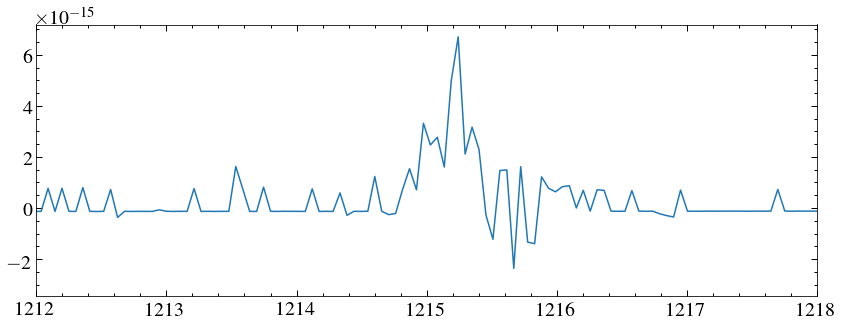

/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v01010_new_x1d.fits
5.923286e-15


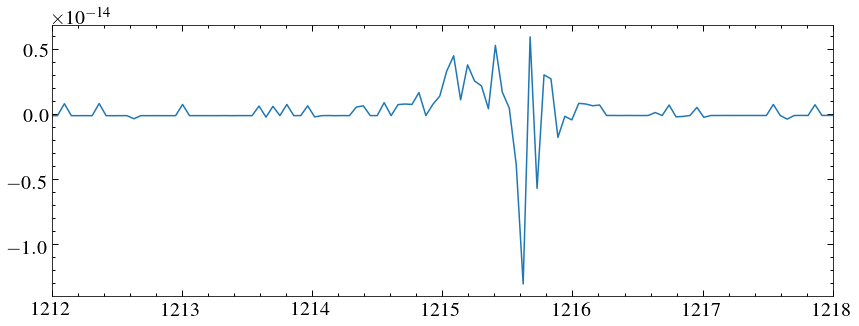

/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v03010_new_x1d.fits
4.0671164e-15


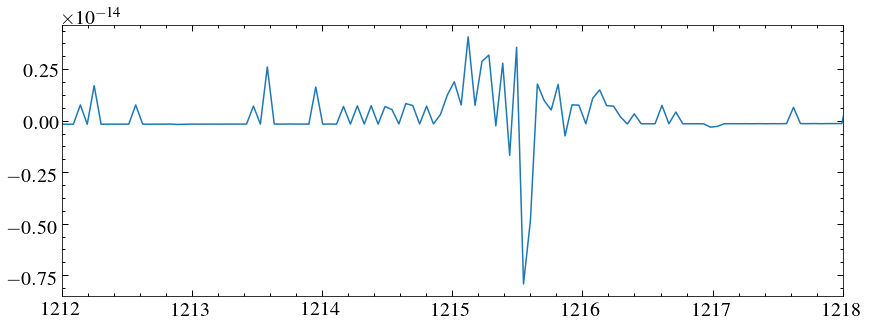

/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v01020_new_x1d.fits
9.840815e-15


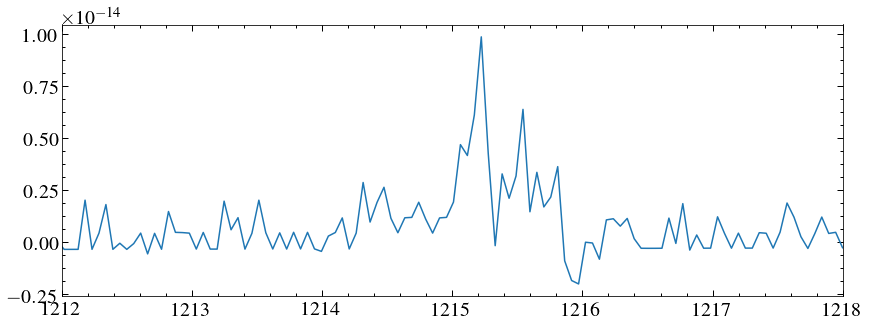

In [84]:
for x in new_x1ds:
    data = fits.getdata(x,1)[0]
    print(x)
    plt.plot(data['WAVELENGTH'], data['FLUX'])
    plt.xlim(1212, 1218)
    print(max(data['FLUX']))
    plt.show()

Ok so it worked by trial and error of maxrch- can I do this for all spectra? 

In [72]:
flts

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01010_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v01020_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v02010_flt.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/od3v03010_flt.fits']

In [74]:
new_x1ds

['/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v02010_new_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v01010_new_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v03010_new_x1d.fits',
 '/home/david/work/muscles/trappist-1/hst/g140m_cals/b_test/outputs/od3v01020_new_x1d.fits']

In [75]:
ordered_x1ds = [new_x1ds[1], new_x1ds[3],new_x1ds[0],new_x1ds[2]]

421.963


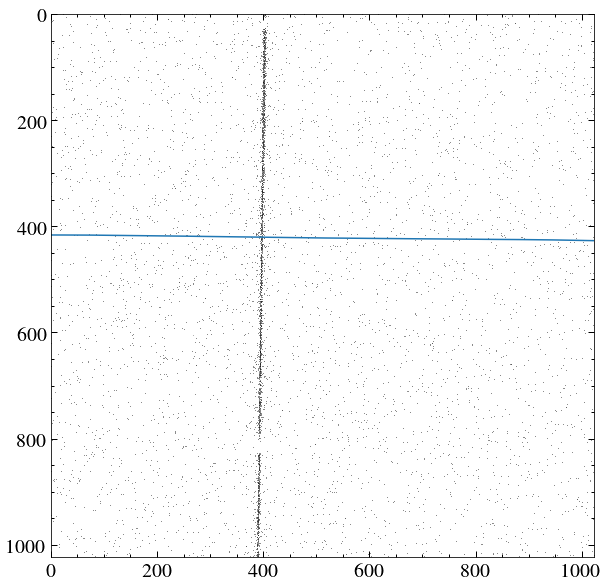

419.90884


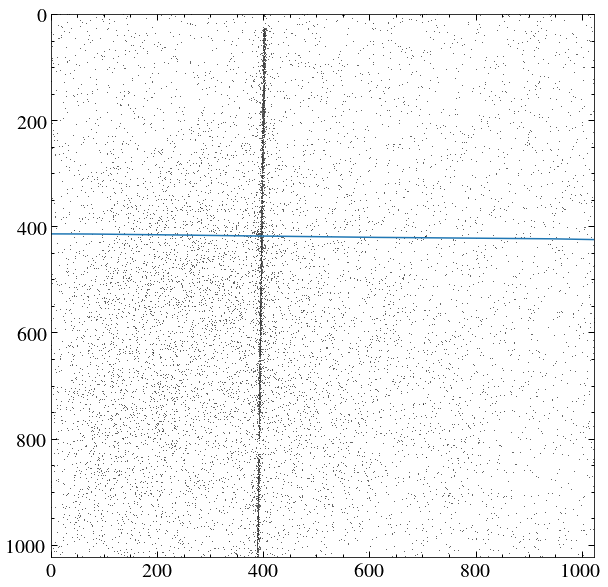

417.2008


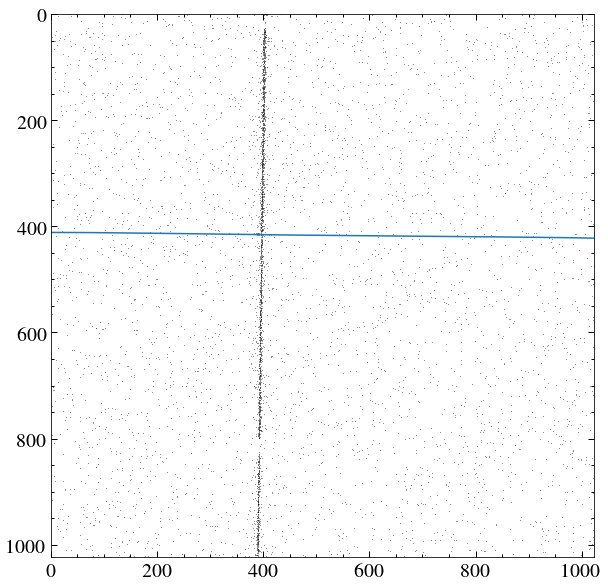

181.83386


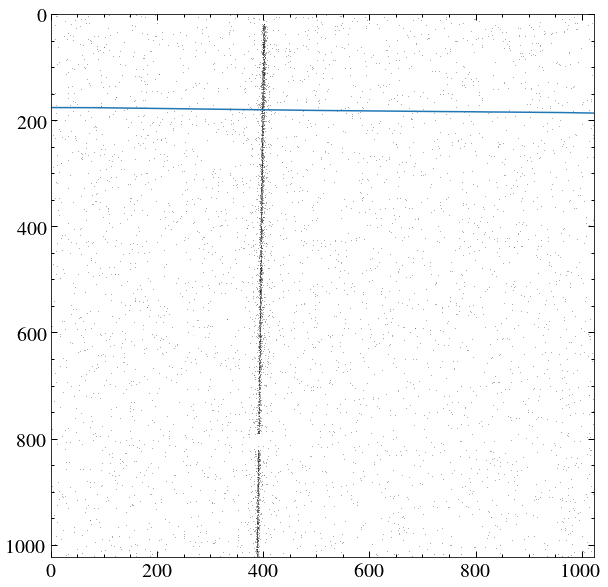

In [83]:
for flt, x in zip(flts, ordered_x1ds):
    plt.figure(figsize=(10,10))
    dt = fits.getdata(flt,1)
    plt.imshow(dt, cmap=cm.gray_r, norm = LogNorm())
    y = fits.getdata(x,1)[0]['EXTRLOCY']
    print(y[513])
    plt.plot(np.arange(len(y)), y)
    plt.show()

So that's spot all for all of them. Yay? Maybe we can try varying them all, see what happens